In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [29]:
file_pred = open("../data/predictions.txt", 'r')
pred_list = file_pred.readlines()

data_prediction = []
for sub in pred_list:
    data_prediction.append(sub.replace("\n", ""))


In [30]:
file_truth = open("../data/truth.txt", 'r')
data_list = file_truth.readlines()

data_truth = []
for sub in data_list:
    data_truth.append(sub.replace("\n", ""))


In [31]:
# from sklearn import metrics

# confusion_matrix = metrics.confusion_matrix(data_truth, data_prediction, labels=["Jedi", "Sith"])

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
# cm_display.plot()
# plt.show()

In [32]:
# print(metrics.classification_report(data_truth, data_prediction, target_names=["Jedi", "Sith"]))

In [33]:
data_truthj = np.asarray(list(map(lambda x:0 if x == "Jedi" else 1, data_truth)))
data_predictionj = np.asarray(list(map(lambda x:0 if x == "Jedi" else 1, data_prediction)))

TP = np.sum(np.logical_and(data_predictionj == 0, data_truthj == 0))
TN = np.sum(np.logical_and(data_predictionj == 1, data_truthj == 1))
FP = np.sum(np.logical_and(data_predictionj == 0, data_truthj == 1))
FN = np.sum(np.logical_and(data_predictionj == 1, data_truthj == 0))

P = TP + FN
N = FP + TN

In [34]:
accuracy = round((TP + TN) / (P + N), 2)
precision = round(TP / (TP + FP), 2)
recall = round(TP / (TP+ FN), 2)
f1_score = round(2 * ((precision * recall) / (precision + recall)), 2)

In [35]:
data_truths = np.asarray(list(map(lambda x:0 if x == "Sith" else 1, data_truth)))
data_predictions = np.asarray(list(map(lambda x:0 if x == "Sith" else 1, data_prediction)))

TPs = np.sum(np.logical_and(data_predictions == 0, data_truths == 0))
TNs = np.sum(np.logical_and(data_predictions == 1, data_truths == 1))
FPs = np.sum(np.logical_and(data_predictions == 0, data_truths == 1))
FNs = np.sum(np.logical_and(data_predictions == 1, data_truths == 0))

Ps = TPs + FNs
Ns = FPs + TNs

In [36]:
accuracys = round((TPs + TNs) / (Ps + Ns), 2)
precisions = round(TPs / (TPs + FPs), 2)
recalls = round(TPs / (TPs+ FNs), 2)
f1_scores = round(2 * ((precisions * recalls) / (precisions + recalls)), 2)

In [37]:
print(f"{'':<10}{'precision':<10}{'recall':<10}{'f1-score':<10}{'total':<10}")
print()
print(f"{'Jedi':<10}{precision:<10.2f}{recall:<10.2f}{f1_score:<10.2f}{P:<10}")
print(f"{'Sith':<10}{precisions:<10.2f}{recalls:<10.2f}{f1_scores:<10.2f}{Ps:<10}")
print()
print(f"{'accuracy':<30}{accuracy:<10.2f}{P + Ps:<10}")

print()
print(f'[[{TP} {FN}]')
print(f'[[{FP} {TN}]]')

          precision recall    f1-score  total     

Jedi      0.45      0.51      0.48      49        
Sith      0.47      0.41      0.44      51        

accuracy                      0.46      100       

[[25 24]
[[30 21]]


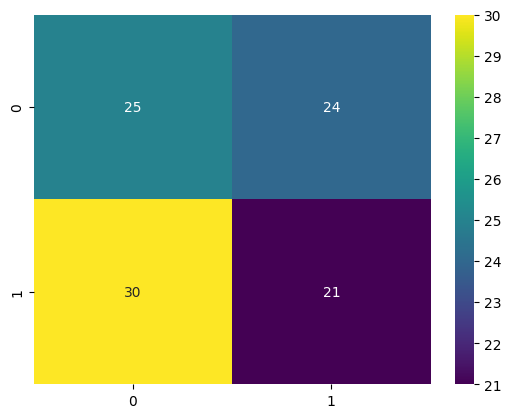

In [38]:
confu_matrix = np.array([[TP, FN], [FP, TN]])
plt.figure()
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.show()

In [39]:
file_pred.close()
file_truth.close()